In [59]:
import requests
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

# from tensorflow.keras import datasets, layers, models
# import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

X_train = np.load('data/X_train.npy')
y_train = np.load('data/y_train.npy')
X_test = np.load('data/X_test.npy')
y_test = np.load('data/y_test.npy')

In [ ]:
total_points
team_h_score', 'team_a_score'


In [61]:
train_df[train_df['minutes'] > 0]
test_df[test_df['minutes'] > 0]

element  total_points  was_home  team_h_score  team_a_score  minutes   
23           1             1     False           3.0           2.0        7  \
25           1             1     False           2.0           1.0        8   
26           1             2      True           0.0           1.0       67   
29           1             1     False           1.0           0.0       22   
31           1             2     False           1.0           0.0       90   
...        ...           ...       ...           ...           ...      ...   
25244      736             1     False           3.0           1.0        2   
25249      736             0     False           4.0           1.0       21   
25551      762             1     False           4.0           1.0        5   
25564      769             1     False           3.0           1.0        6   
25565      770             1     False           3.0           1.0       20   

       goals_scored  assists  clean_sheets  goals_conceded  own_goals   
23                0        0             0               1          0  \
25                0        0             0               0          0   
26                0        0             0               1          0   
29                0        0             0               0          0   
31                0        0             0               1          0   
...             ...      ...           ...             ...        ...   
25244             0        0             0               1          0   
25249             0        0             0               2          0   
25551             0        0             0               2          0   
25564             0        0             0               0          0   
25565             0        0             0               0          0   

       penalties_saved  penalties_missed  yellow_cards  red_cards  saves   
23                   0                 0             0          0      0  \
25                   0                 0             0          0      0   
26                   0                 0             0          0      0   
29                   0                 0             0          0      0   
31                   0                 0             0          0      0   
...                ...               ...           ...        ...    ...   
25244                0                 0             0          0      0   
25249                0                 0             0          0      0   
25551                0                 0             0          0      0   
25564                0                 0             0          0      0   
25565                0                 0             0          0      0   

       bonus  bps influence creativity threat ict_index  starts   
23         0    5       4.2        0.3    0.0       0.5       0  \
25         0    3       0.8        0.4    0.0       0.1       0   
26         0   19      20.2       32.4    6.0       5.9       1   
29         0    4       6.2        1.2    2.0       0.9       0   
31         0   17      22.2       15.4    2.0       4.0       1   
...      ...  ...       ...        ...    ...       ...     ...   
25244      0    3       0.2        0.3    0.0       0.1       0   
25249      0    7       6.0        1.2    0.0       0.7       0   
25551      0    3       0.0        0.3    5.0       0.5       0   
25564      0    1       0.0        0.3    0.0       0.0       0   
25565      0    3       1.0        0.3    0.0       0.1       0   

      expected_goals expected_assists expected_goal_involvements   
23              0.00             0.00                       0.00  \
25              0.00             0.00                       0.00   
26              0.02             0.11                       0.13   
29              0.00             0.00                       0.00   
31              0.04             0.07                       0.11   
...              ...              ...                  

In [30]:
train_df.columns

Index(['element', 'total_points', 'was_home', 'team_h_score', 'team_a_score',
       'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded', 'value',
       'transfers_balance', 'selected', 'transfers_in', 'transfers_out',
       'time_diffs', 'position_1', 'position_2', 'position_3', 'position_4'],
      dtype='object')

<Axes: ylabel='Frequency'>

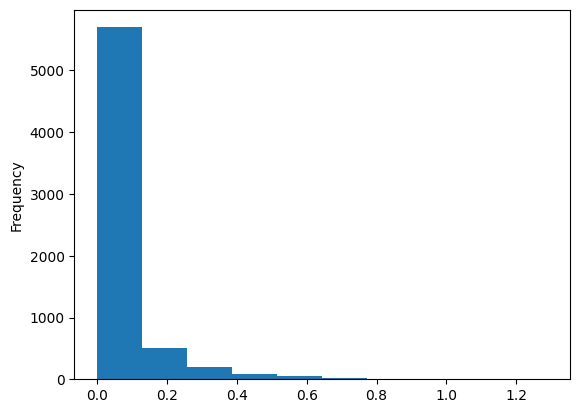

In [68]:
pd.to_numeric(train_df[train_df['minutes'] > 0]['expected_assists']).plot.hist()

In [14]:
cutoff = 24

train_df = data[data['round'] < cutoff].drop('round', axis=1)
test_df = data[data['round'] >= cutoff].drop('round', axis=1)

# Assuming you have train_df and test_df as your train and test dataframes respectively

# Get the column names of the dataframes
train_columns = train_df.columns
test_columns = test_df.columns

# Remove the 'element' column from the column names
columns_to_scale = train_columns[train_columns != 'element']

# Extract the data from the train and test dataframes for the columns to be scaled
train_data_to_scale = train_df[columns_to_scale].values
test_data_to_scale = test_df[columns_to_scale].values

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the train data
scaler.fit(train_data_to_scale)

# Scale the columns of the train and test data using the statistics from the train data
scaled_train_data = scaler.transform(train_data_to_scale)
scaled_test_data = scaler.transform(test_data_to_scale)

# Create new dataframes with the scaled data and the same columns as the original train and test dataframes
scaled_train_df = pd.DataFrame(scaled_train_data, columns=columns_to_scale, index=train_df.index)
scaled_test_df = pd.DataFrame(scaled_test_data, columns=columns_to_scale, index=test_df.index)

# Concatenate the scaled train and test dataframes with the 'element' column from the original train and test dataframes
scaled_train_df = pd.concat([train_df['element'], scaled_train_df], axis=1)
scaled_test_df = pd.concat([test_df['element'], scaled_test_df], axis=1)



In [15]:
scaled_train_df

element  total_points  was_home  team_h_score  team_a_score   minutes   
0            1     -0.529576 -0.999723     -1.114982      0.801183 -0.769477  \
1            1     -0.529576  1.000277      1.693280      0.801183 -0.769477   
2            1     -0.529576 -0.999723     -1.114982      1.728618 -0.769477   
3            1     -0.529576  1.000277      0.289149     -0.126252 -0.769477   
4            1     -0.529576  1.000277      0.289149     -0.126252 -0.769477   
...        ...           ...       ...           ...           ...       ...   
25319      741     -0.529576 -0.999723     -0.412917     -0.126252 -0.769477   
25335      742     -0.529576  1.000277     -1.114982      0.801183 -0.769477   
25351      743     -0.529576  1.000277     -1.114982      0.801183 -0.769477   
25367      744     -0.529576 -0.999723      0.991214     -0.126252 -0.769477   
25383      745     -0.529576 -0.999723      0.991214     -0.126252 -0.769477   

       goals_scored   assists  clean_sheets  goals_conceded  ...     value   
0         -0.182861 -0.179801     -0.327766       -0.491452  ... -0.406956  \
1         -0.182861 -0.179801     -0.327766       -0.491452  ... -0.493436   
2         -0.182861 -0.179801     -0.327766       -0.491452  ... -0.493436   
3         -0.182861 -0.179801     -0.327766       -0.491452  ... -0.579916   
4         -0.182861 -0.179801     -0.327766       -0.491452  ... -0.579916   
...             ...       ...           ...             ...  ...       ...   
25319     -0.182861 -0.179801     -0.327766       -0.491452  ... -0.406956   
25335     -0.182861 -0.179801     -0.327766       -0.491452  ... -0.839356   
25351     -0.182861 -0.179801     -0.327766       -0.491452  ... -0.839356   
25367     -0.182861 -0.179801     -0.327766       -0.491452  ... -0.839356   
25383     -0.182861 -0.179801     -0.327766       -0.491452  ... -0.839356   

       transfers_balance  selected  transfers_in  transfers_out  time_diffs   
0              -0.014620 -0.295210     -0.248811      -0.269414   -0.962190  \
1              -0.075687 -0.294908     -0.231027      -0.170599   -0.088702   
2              -0.065858 -0.299283     -0.237326      -0.190483   -0.165775   
3              -0.049920 -0.302172     -0.241272      -0.215467   -0.177452   
4              -0.033653 -0.303572     -0.243519      -0.238907   -0.504426   
...                  ...       ...           ...            ...         ...   
25319          -0.014620 -0.327645     -0.248811      -0.269414   -0.962190   
25335          -0.014620 -0.327645     -0.248811      -0.269414   -0.962190   
25351          -0.014620 -0.327645     -0.248811      -0.269414   -0.962190   
25367          -0.014620 -0.327645     -0.248811      -0.269414   -0.962190   
25383          -0.014620 -0.327645     -0.248811      -0.269414   -0.962190   

       position_1  position_2  position_3  position_4  
0       -0.339556    1.356921   -0.869528   -0.358902  
1       -0.339556    1.356921   -0.869528   -0.358902  
2       -0.339556    1.356921   -0.869528   -0.358902  
3       -0.339556    1.356921   -0.869528   -0.358902  
4       -0.339556    1.356921   -0.869528   -0.358902  
...           ...         ...         ...         ...  
25319   -0.339556   -0.736962    1.150049   -0.358902  
25335   -0.339556    1.356921   -0.869528   -0.358902  
25351   -0.339556    1.356921   -0.869528   -0.358902  
25367   -0.339556    1.356921   -0.869528   -0.358902  
25383    2.945020   -0.736962   -0.869528   -0.358902  

[14442 rows x 37 columns]

In [3]:
# download data----------------------------------------------------------------
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

headers = {'Accept': 'application/json'}

resp = requests.get(url, headers=headers).json()

player_positions = pd.DataFrame.from_dict({player['id']: {
        f'position_{pos_id}':
        player['element_type'] == pos_id for pos_id in range(1, 5)}
    for player in resp['elements']},
    orient='index').reset_index(names=['element'])

data = []
for player in tqdm(resp['elements'], desc='downloading data'):

    player_pos = player['element_type']
    player_id = player['id']

    url = f'https://fantasy.premierleague.com/api/element-summary/{player_id}/'

    resp_p = requests.get(url, headers=headers).json()

    data += resp_p['history']

# convert to dataframe---------------------------------------------------------
data = pd.DataFrame(data)

data['kickoff_time'] = pd.to_datetime(data['kickoff_time'])

data = data.dropna(subset=['team_h_score']).merge(
    player_positions, on='element').sort_values(['element', 'kickoff_time'])

data['time_diffs'] = (
    data.groupby('element')['kickoff_time'].diff().dt.total_seconds()/3600
    ).fillna(0)

wrangle_cols = ['element', 'round']

feature_cols = [
    'total_points', 'was_home', 'team_h_score', 'team_a_score', 'minutes',
    'goals_scored', 'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
    'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
    'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat', 'ict_index',
    'starts', 'expected_goals', 'expected_assists',
    'expected_goal_involvements', 'expected_goals_conceded', 'value',
    'transfers_balance', 'selected', 'transfers_in', 'transfers_out',
    'time_diffs', 'position_1', 'position_2', 'position_3', 'position_4']

data = data[wrangle_cols + feature_cols].reset_index(drop=True)

downloading data:   0%|          | 0/771 [00:00<?, ?it/s]

In [200]:
# test-train split-------------------------------------------------------------
window_size = 3


def get_window_arrays(data):

    X, y = [], []
    for player in tqdm(data['element'].unique(), desc='creating frames'):

        player_data = data[
            data['element'] == player].drop('element', axis=1).copy()

        frame_generator = player_data.drop(
            player_data.tail(1).index).rolling(window=window_size)

        for window in frame_generator:

            if len(window) >= 3:
                X.append(np.array(window))

                points_index = window.index[-1]
                y.append(player_data['total_points'].loc[points_index + 1])

    print(X)

    return np.array(X) * 1.0, np.array(y)


cutoff = 24

train_data = data[data['round'] < cutoff].drop('round', axis=1)
test_data = data[data['round'] >= cutoff].drop('round', axis=1)

X_train, y_train = get_window_arrays(train_data)
# X_test, y_test = get_window_arrays(test_data)

np.save('data/X_train', X_train)
np.save('data/y_train', y_train)
np.save('data/X_test', X_test)
np.save('data/y_test', y_test)


creating frames:   0%|          | 0/745 [00:00<?, ?it/s]

[array([[0, False, 0.0, 2.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0.0',
        '0.0', '0.0', '0.0', 0, '0.00', '0.00', '0.00', '0.00', 45, 0,
        23970, 0, 0, 0.0, False, True, False, False],
       [0, True, 4.0, 2.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0.0',
        '0.0', '0.0', '0.0', 0, '0.00', '0.00', '0.00', '0.00', 44,
        -5169, 24193, 1361, 6530, 187.0, False, True, False, False],
       [0, False, 0.0, 3.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0.0',
        '0.0', '0.0', '0.0', 0, '0.00', '0.00', '0.00', '0.00', 44,
        -4337, 20960, 879, 5216, 170.5, False, True, False, False]],
      dtype=object), array([[0, True, 4.0, 2.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0.0',
        '0.0', '0.0', '0.0', 0, '0.00', '0.00', '0.00', '0.00', 44,
        -5169, 24193, 1361, 6530, 187.0, False, True, False, False],
       [0, False, 0.0, 3.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0.0',
        '0.0', '0.0', '0.0', 0, '0.00', '0.00', '0.00', '0.00', 44,
      

TypeError: can't multiply sequence by non-int of type 'float'

In [210]:
np.array([1,2,'a'], float)

ValueError: could not convert string to float: 'a'

In [193]:
def get_window_arrays(data):

    X, y = [], []
    for player in tqdm(data['element'].unique(), desc='creating frames'):

        player_data = data[
            data['element'] == player].drop('element', axis=1).copy()

        frame_generator = player_data.drop(
            player_data.tail(1).index).rolling(window=window_size)

        for window in frame_generator:

            if len(window) >= 3:
                X.append(np.array(window, float))

                points_index = window.index[-1]
                y.append(player_data['total_points'].loc[points_index + 1])

    return np.array(X), np.array(y, float)

cutoff = 24

train_data = data[data['round'] < cutoff].drop('round', axis=1)
test_data = data[data['round'] >= cutoff].drop('round', axis=1)



X_test, y_test = get_window_arrays(test_data)

creating frames:   0%|          | 0/771 [00:00<?, ?it/s]

In [197]:
X_test.shape

(8825, 3, 36)

In [20]:
test = pd.read_csv('data/data.csv')

test = test.join(pd.get_dummies(test['opponent_team'], prefix='opponent_team')).drop(
    ['opponent_team'], axis=1)*1.0



player = test['element'].unique()[0]

cut = test[test['element'] == player].copy().drop(['element', 'fixture', 'round'], axis=1)

cut = np.array(cut)

for i in range(cut.shape[0]):
    print(i, i + 2)
cut[0:3,:]

0 2
1 3
2 4
3 5
4 6
5 7
6 8
7 9
8 10
9 11
10 12
11 13
12 14
13 15
14 16
15 17
16 18
17 19
18 20
19 21
20 22
21 23
22 24
23 25
24 26
25 27
26 28
27 29
28 30
29 31
30 32
31 33
32 34
33 35


array([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  2.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  4.5000e+01,  0.0000e+00,  2.3970e+04,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00],
       [ 0.0000e+00,  1.0000e+00,  4.0000e+00,  2.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e

array([[1, 7, 0, ..., False, False, 0.0],
       [1, 10, 0, ..., False, False, 187.0],
       [1, 3, 0, ..., False, False, 170.5],
       ...,
       [763, 10, 0, ..., True, False, 0.0],
       [763, 17, 0, ..., True, False, 120.0],
       [764, 2, 0, ..., True, False, 0.0]], dtype=object)

In [12]:
from tensorflow.keras.datasets import mnist

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
X_test.shape

(10000, 28, 28)

In [22]:
np.save('data/digits', X_test)